In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [157]:
df = pd.read_csv('Suicide_Detection.csv')

In [116]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [117]:
df.columns.to_list()

['Unnamed: 0', 'text', 'class']

In [118]:
df.describe()

,Unnamed: 0
count,232074.000000
mean,174152.863518
std,100500.425362
min,2.000000
25%,87049.250000
50%,174358.500000
75%,261285.750000
max,348110.000000


In [119]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [121]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [122]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [156]:
df.tail()

,text,class,text_preprocessed,text_length,text_length_char,text_length_words
232069,if you don't like rock then your not going to ...,non-suicide,dont like rock going get anything go httpsmusi...,19,152,19
232070,you how you can tell i have so many friends an...,non-suicide,tell many friends lonely everything deprived p...,31,158,31
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,pee probably tastes like salty tea someone dra...,14,87,14
232072,the usual stuff you find herei'm not posting t...,suicide,usual stuff find hereim posting sympathy pity ...,364,1834,364
232073,i still haven't beaten the first boss in hollo...,non-suicide,still havent beaten first boss hollow knight i...,33,167,33


In [123]:
print(len(df))

232074


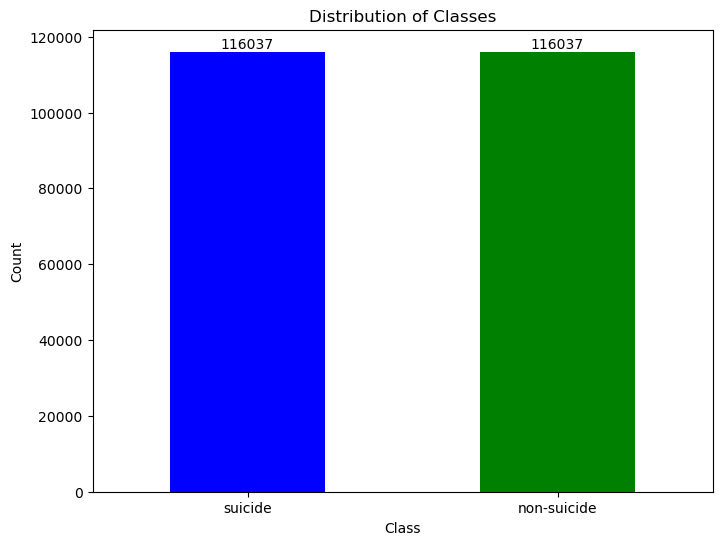

In [87]:
class_distribution = df['class'].value_counts()

#plot the distribution of each class
plt.figure(figsize=(8, 6))
bars = class_distribution.plot(kind='bar', color=['blue', 'green'])  # You can change the colors as needed
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', 
                 va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [124]:
df["text"] = df["text"].str.lower()

In [125]:
df.head()

,text,class
0,ex wife threatening suiciderecently i left my ...,suicide
1,am i weird i don't get affected by compliments...,non-suicide
2,finally 2020 is almost over... so i can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"i’m so losthello, my name is adam (16) and i’v...",suicide


In [126]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Remove stop words and create word clouds
stop_words = set(stopwords.words('english'))

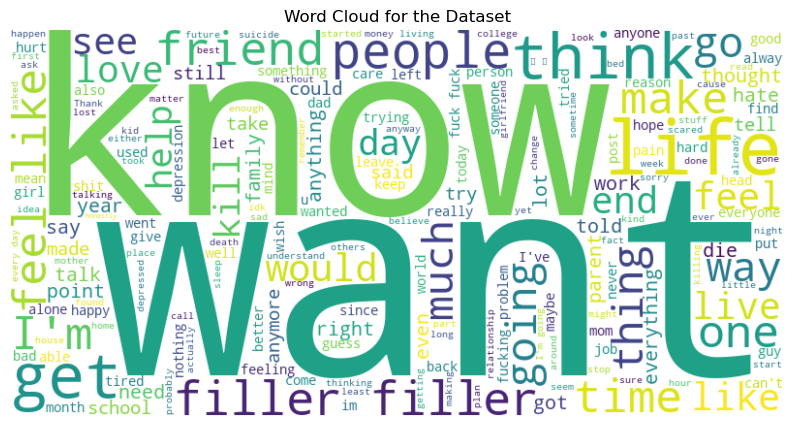

In [158]:


text_data = ' '.join(df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words).generate(text_data)


# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for the Dataset')
plt.show()

In [132]:
# Filter data for suicides
suicide_data = df[df["class"] == "suicide"]

# Filter data for non-suicides
non_suicide_data = df[df["class"] == "non-suicide"]

In [ ]:
#def create_wordcloud(text, filename):
#    wordcloud = WordCloud(background_color='black',stopwords=stop_words).generate(text)
#    wordcloud.to_file(filename)

#create_wordcloud(" ".join(all_data), "all_wordcloud.png")
#create_wordcloud(" ".join(suicide_data["text"]), "suicide_wordcloud.png")
#create_wordcloud(" ".join(non_suicide_data["text"]), "non_suicide_wordcloud.png")

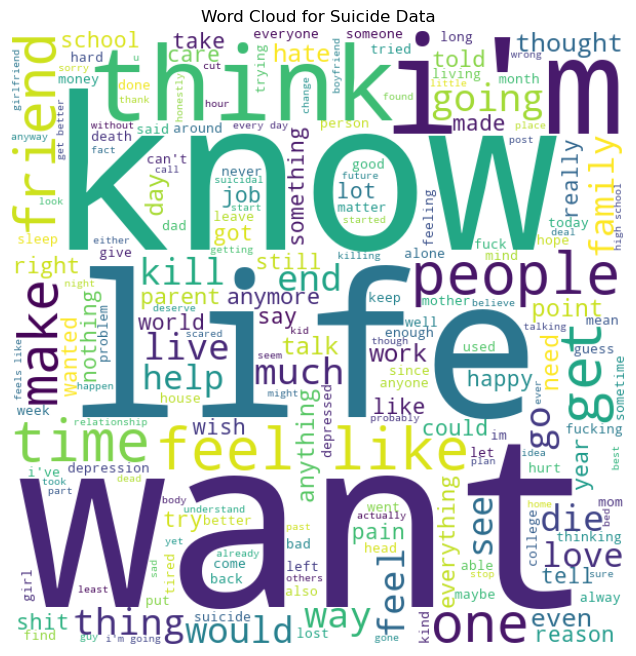

In [133]:
suicide_text = ' '.join(suicide_data['text'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white',stopwords=stop_words).generate(suicide_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Suicide Data')
plt.show()

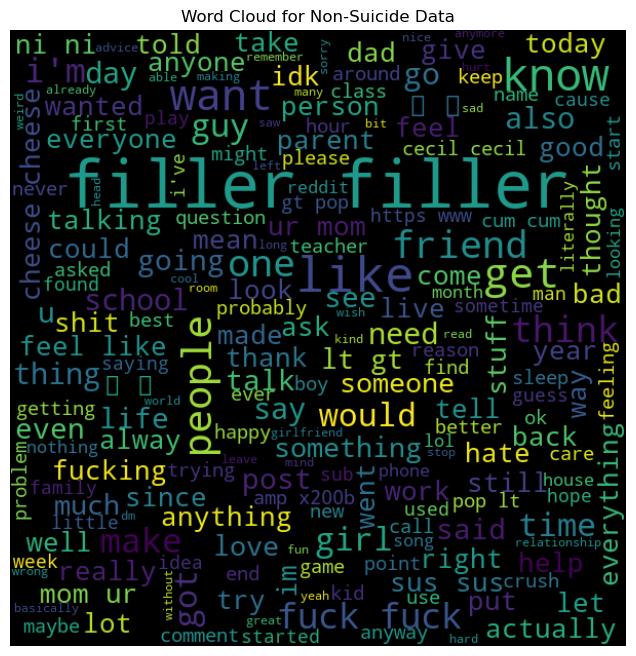

In [131]:
non_suicide_text = ' '.join(non_suicide_data['text'])
# Generate the word cloud
wordcloud = WordCloud(width=600, height=600, background_color='black',stopwords=stop_words).generate(non_suicide_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Non-Suicide Data')
plt.show()

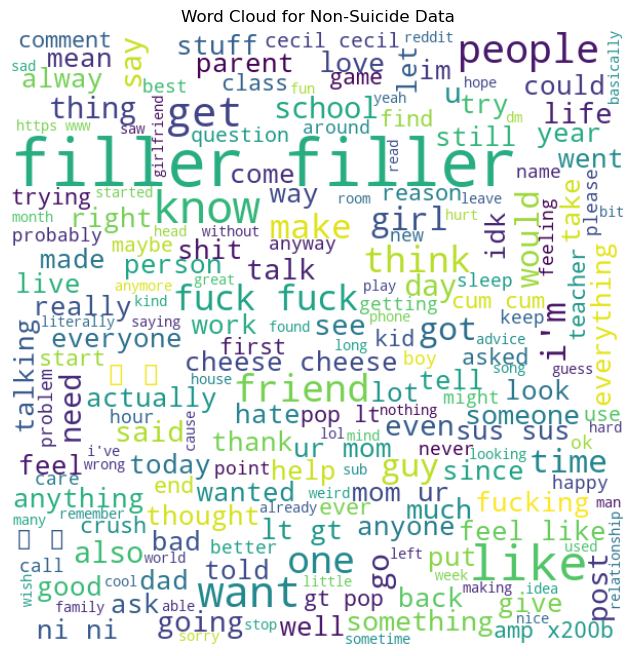

In [134]:
non_suicide_text = ' '.join(non_suicide_data['text'])
# Generate the word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white',stopwords=stop_words).generate(non_suicide_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Non-Suicide Data')
plt.show()

In [143]:
df["text_length"] = df["text"].str.split().str.len()
print(f"Descriptive statistics for text length:\n{df['text_length'].describe()}")

Descriptive statistics for text length:
count    232074.000000
mean        131.925235
std         217.476787
min           1.000000
25%          26.000000
50%          60.000000
75%         155.000000
max        9684.000000
Name: text_length, dtype: float64


In [144]:
df["text_length_char"] = df["text"].str.len()
average_char_length = df["text_length_char"].mean()
print(f"Average number of characters: {average_char_length:.2f}")

Average number of characters: 689.64


In [145]:
df["text_length_words"] = df["text"].str.split().str.len()
print(f"Descriptive statistics for word count:\n{df['text_length_words'].describe()}")


Descriptive statistics for word count:
count    232074.000000
mean        131.925235
std         217.476787
min           1.000000
25%          26.000000
50%          60.000000
75%         155.000000
max        9684.000000
Name: text_length_words, dtype: float64


In [146]:
class_wise_word_counts = df.groupby("class")["text_length_words"].describe()
print(class_wise_word_counts)

                count        mean         std  min   25%    50%    75%     max
class                                                                         
non-suicide  116037.0   61.188302  139.292553  2.0  19.0   31.0   60.0  8220.0
suicide      116037.0  202.662168  255.309193  1.0  60.0  127.0  251.0  9684.0


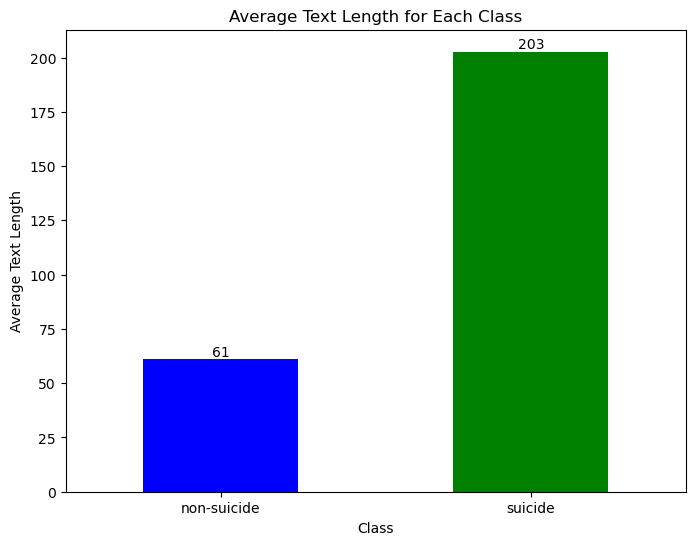

In [154]:
average_word_counts = class_wise_word_counts['mean']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = average_word_counts.plot(kind='bar', color=['blue', 'green']) 
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', 
                 va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.title('Average Text Length for Each Class')
plt.xlabel('Class')
plt.ylabel('Average Text Length')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()




In [155]:
def avg_word_length(text_list):
  total_words = sum(len(word) for text in text_list for word in text.split())
  total_characters = sum(len(text) for text in text_list)
  # Remove whitespace characters in case any exist
  total_characters -= sum(text.count(" ") for text in text_list)
  return total_characters / total_words

average_word_length = avg_word_length(df["text"])
print(f"Average word length: {average_word_length:.2f}")

Average word length: 1.01


In [57]:
from nltk.corpus import stopwords
from collections import Counter

stop_words_list = set(stopwords.words("english"))

[('to', 1011209), ('and', 850132), ('the', 631142), ('a', 605255), ('my', 548637), ('of', 427752), ('that', 308361), ('in', 301396), ('me', 301288), ('it', 269060)]


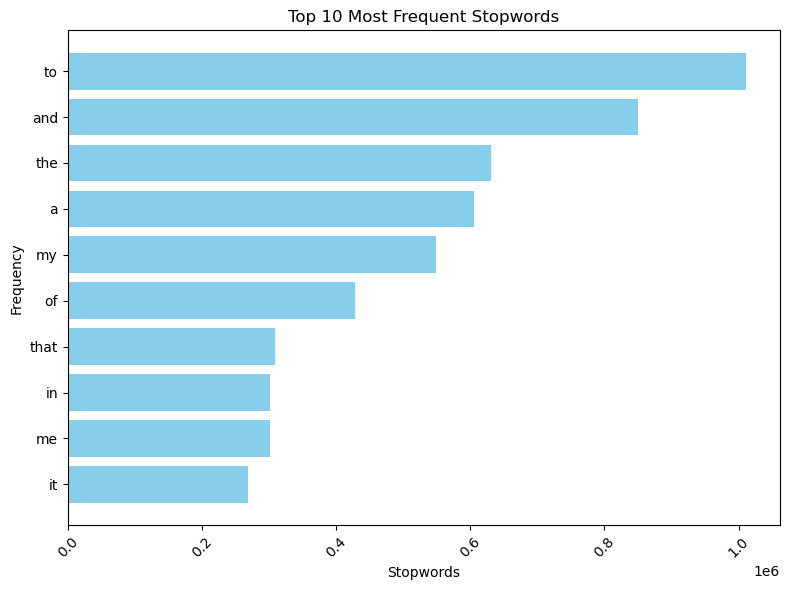

In [77]:
stop_word_counts = Counter()
for text in df["text"]:
    words = [word.lower() for word in text.split() if word in stop_words_list]
    stop_word_counts.update(words)

top_10_stop_words = stop_word_counts.most_common(10)
print(top_10_stop_words)

# Sort top_10_stop_words in descending order by count
top_10_stop_words.sort(key=lambda x: x[1], reverse=True)

labels, counts = zip(*top_10_stop_words)  # Unpack word and count pairs

plt.figure(figsize=(8, 6))
plt.barh(labels, counts, color='skyblue')
# Invert the y-axis to achieve descending order
plt.gca().invert_yaxis()  # Use gca() to access the current axes
plt.xlabel("Stopwords")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Stopwords")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [142]:
df.head()

,text,class,text_preprocessed,text_length
0,ex wife threatening suiciderecently i left my ...,suicide,ex wife threatening suiciderecently left wife ...,143
1,am i weird i don't get affected by compliments...,non-suicide,weird dont get affected compliments coming som...,27
2,finally 2020 is almost over... so i can never ...,non-suicide,finally 2020 almost never hear 2020 bad year e...,26
3,i need helpjust help me im crying so hard,suicide,need helpjust help im crying hard,9
4,"i’m so losthello, my name is adam (16) and i’v...",suicide,im losthello name adam 16 ive struggling years...,438


In [136]:
import re  # For regular expressions to remove punctuation
from nltk.corpus import stopwords  # For stop word list
from nltk.tokenize import word_tokenize  # For tokenization

def preprocess_text(text):

  # Remove punctuation using regular expressions
  re_punctuation = r"[^\w\s]"
  text = re.sub(re_punctuation, "", text)

  # Remove stop words (adapt stopwords_list as needed)
  stop_words_list = set(stopwords.words("english"))
  tokens = [word for word in word_tokenize(text) if word not in stop_words_list]

  return " ".join(tokens)  # Join tokens back into a string


In [137]:
df["text_preprocessed"] = df["text"].apply(preprocess_text)

In [138]:
df.head()

,text,class,text_preprocessed
0,ex wife threatening suiciderecently i left my ...,suicide,ex wife threatening suiciderecently left wife ...
1,am i weird i don't get affected by compliments...,non-suicide,weird dont get affected compliments coming som...
2,finally 2020 is almost over... so i can never ...,non-suicide,finally 2020 almost never hear 2020 bad year e...
3,i need helpjust help me im crying so hard,suicide,need helpjust help im crying hard
4,"i’m so losthello, my name is adam (16) and i’v...",suicide,im losthello name adam 16 ive struggling years...


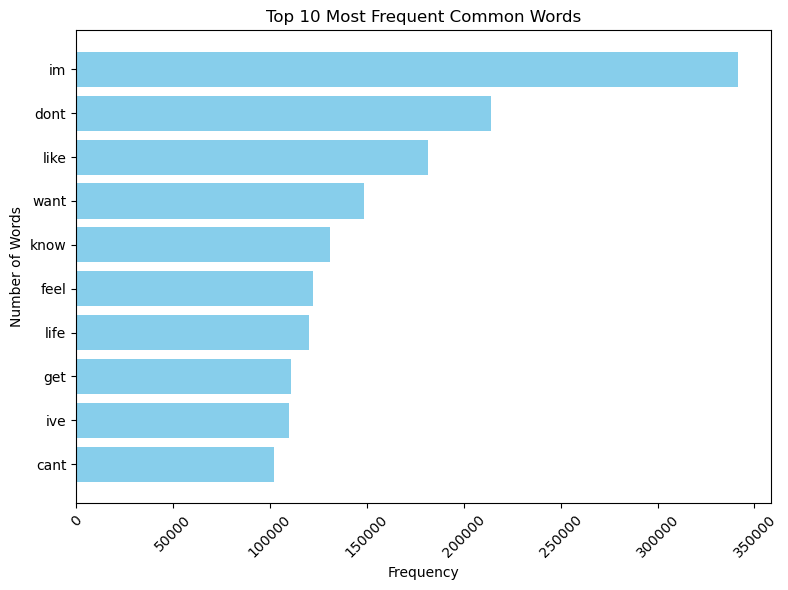

In [106]:
word_counts = Counter()
for tokens in df["text_preprocessed"]:
    # Split each token into individual words
    words = tokens.split()
    # Update the Counter with words
    word_counts.update(words)
top_10_words = word_counts.most_common(10)

# Sort top_10_stop_words in descending order by count
top_10_words.sort(key=lambda x: x[1], reverse=True)

# Extract words and counts
words, counts = zip(*top_10_words)

plt.figure(figsize=(8, 6))
plt.barh(words, counts, color='skyblue')
# Invert the y-axis to achieve descending order
plt.gca().invert_yaxis()  # Use gca() to access the current axes
plt.xlabel("Frequency")
plt.ylabel("Number of Words")
plt.title("Top 10 Most Frequent Common Words")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [108]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 13.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


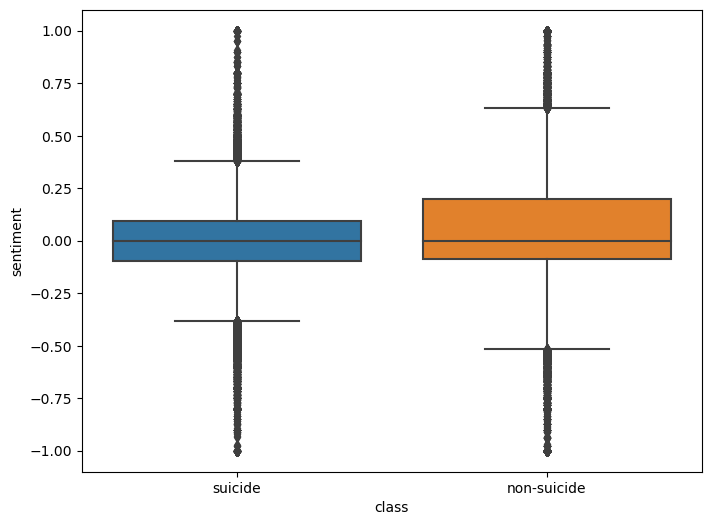

In [109]:
from textblob import TextBlob

df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y="sentiment", data=df)
plt.show()

In [139]:
from textblob import TextBlob
import pandas as pd

# Assuming df is your DataFrame with 'text' and 'class' columns

# Split the dataset into two dataframes based on the 'class' column
suicide_df = df[df['class'] == 'suicide']
non_suicide_df = df[df['class'] == 'non-suicide']

# Perform sentiment analysis for each class
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

suicide_df['sentiment_score'] = suicide_df['text_preprocessed'].apply(get_sentiment)
non_suicide_df['sentiment_score'] = non_suicide_df['text_preprocessed'].apply(get_sentiment)

# Calculate average sentiment score for each class
suicide_avg_sentiment = suicide_df['sentiment_score'].mean()
non_suicide_avg_sentiment = non_suicide_df['sentiment_score'].mean()

print("Average Sentiment Score for Suicide Class:", suicide_avg_sentiment)
print("Average Sentiment Score for Non-suicide Class:", non_suicide_avg_sentiment)


/var/folders/sm/_mx9bhwx3s3cl90f4bt943xc0000gn/T/ipykernel_54330/1823707305.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicide_df['sentiment_score'] = suicide_df['text_preprocessed'].apply(get_sentiment)


Average Sentiment Score for Suicide Class: -0.020832675032549267
Average Sentiment Score for Non-suicide Class: 0.02999611112047804


/var/folders/sm/_mx9bhwx3s3cl90f4bt943xc0000gn/T/ipykernel_54330/1823707305.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_suicide_df['sentiment_score'] = non_suicide_df['text_preprocessed'].apply(get_sentiment)


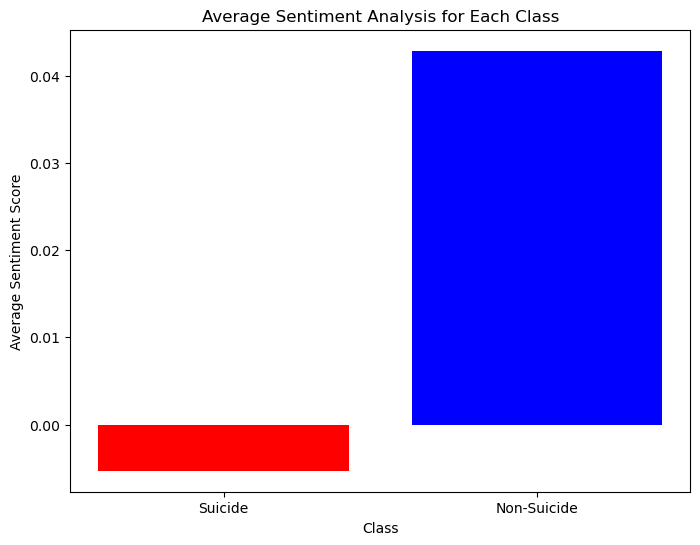

In [114]:
import matplotlib.pyplot as plt

# Average sentiment scores for each class
class_labels = ['Suicide', 'Non-Suicide']
average_sentiments = [suicide_avg_sentiment, non_suicide_avg_sentiment]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, average_sentiments, color=['red', 'blue'])

# Adding labels and title
plt.title('Average Sentiment Analysis for Each Class')
plt.xlabel('Class')
plt.ylabel('Average Sentiment Score')

# Showing the plot
plt.show()